In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import string
import re
import textblob
from textblob import TextBlob
import os

from wordcloud import WordCloud, STOPWORDS
from wordcloud import ImageColorGenerator
import warnings
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tweets_df = pd.read_csv(r'/content/drive/MyDrive/dataset_sma/Tweets.csv')

In [ ]:
tweets_df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
tweets_df.shape

(14640, 15)

In [ ]:
tweets_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
tweets_df.value_counts(tweets_df['airline'])

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

In [ ]:
tweets_df.value_counts(tweets_df['airline_sentiment_gold'])

airline_sentiment_gold
negative    32
positive     5
neutral      3
Name: count, dtype: int64

In [ ]:
tweets_df['airline_sentiment_gold'].isnull().sum()

14600

In [ ]:
tweets_df.value_counts()

tweet_id            airline_sentiment  airline_sentiment_confidence  negativereason    negativereason_confidence  airline     airline_sentiment_gold  name             negativereason_gold  retweet_count  text                                                                                                              tweet_coord                  tweet_created              tweet_location  user_timezone             
567778009013178368  negative           1.0000                        Cancelled Flight  1.0000                     United      negative                realmikesmith    Cancelled Flight     0              @united So what do you offer now that my flight was Cancelled Flighted and I'm stranded away from home and work?  [26.37852293, -81.78472152]  2015-02-17 12:10:00 -0800  Chicago         Eastern Time (US & Canada)    1
569887533267611648  negative           0.8563                        Late Flight       0.5938                     US Airways  negative                ConstanceSCHE

In [ ]:
tweets_df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

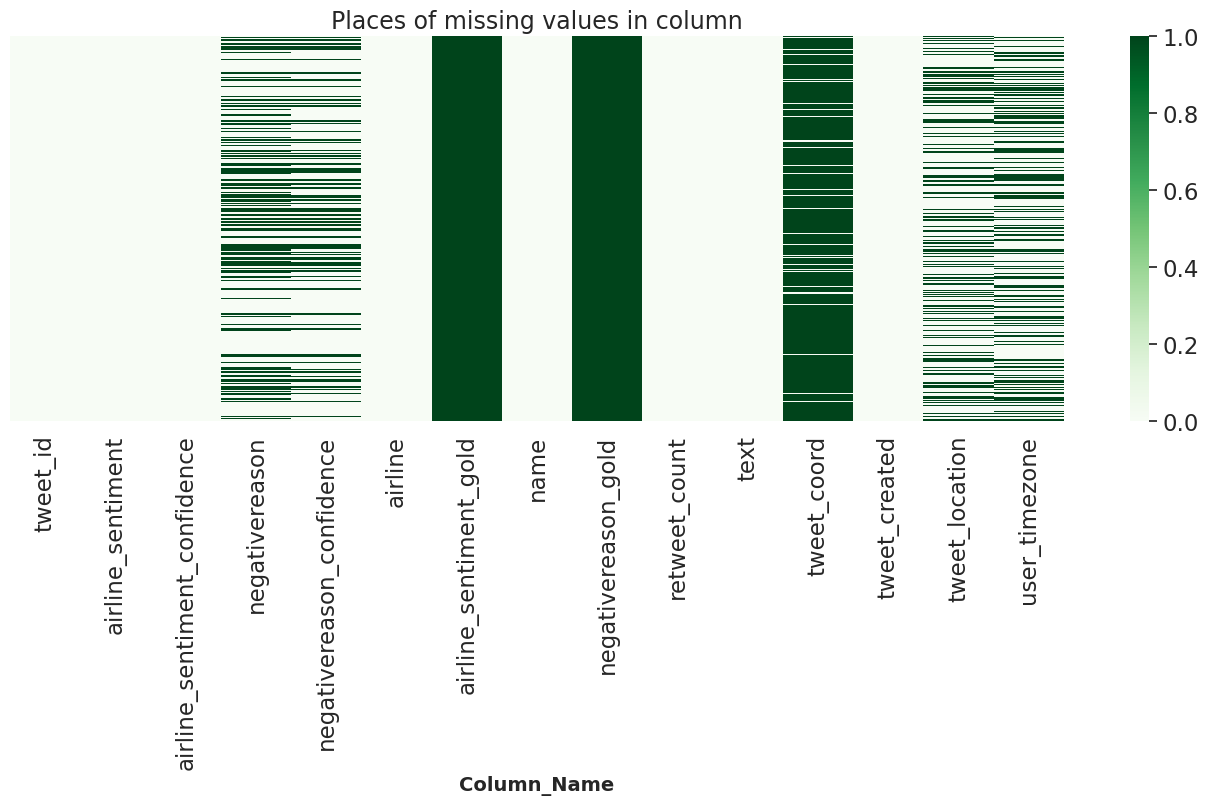

In [ ]:
plt.figure(figsize=(17, 5))
sns.heatmap(tweets_df.isnull(), cbar=True, yticklabels=False,cmap="Greens")
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",size=17)
plt.show()

<Axes: >

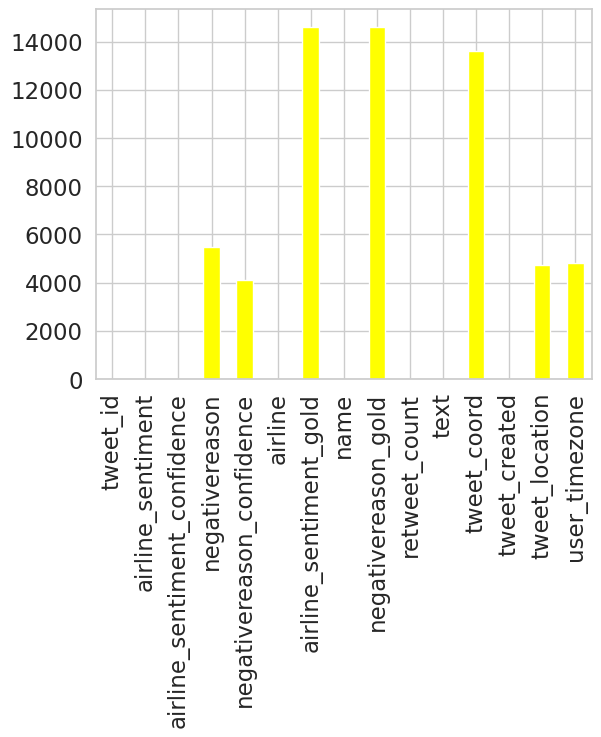

In [ ]:
tweets_df.isnull().sum().plot(kind="bar",color="yellow")

In [ ]:
import plotly.graph_objects as go
Top_Location_Of_tweet= tweets_df['airline'].value_counts().head (10)

In [ ]:
print(Top_Location_Of_tweet)

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64


In [ ]:
from nltk. corpus import stopwords
stop = stopwords.words('english')
tweets_df['text'].apply(lambda x: [item for item in x if item not in stop])
tweets_df.shape

(14640, 15)

In [ ]:
tweets_df['text'].head(10)

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
5    @VirginAmerica seriously would pay $30 a fligh...
6    @VirginAmerica yes, nearly every time I fly VX...
7    @VirginAmerica Really missed a prime opportuni...
8      @virginamerica Well, I didn't…but NOW I DO! :-D
9    @VirginAmerica it was amazing, and arrived an ...
Name: text, dtype: object

In [ ]:
!pip install tweet-preprocessor

In [ ]:
punct  =  ['%','/',':','\\','&amp','&',';','?']

def remove_punctuations(text):
  for punctuation in punct:
    text = text.replace(punctuation,'')
  return text

In [ ]:
tweets_df['text'] = tweets_df['text'].apply(lambda x: remove_punctuations(x))

In [ ]:
tweets_df['text'].isnull().sum()

0

In [ ]:
tweets_df['text'].replace( '', np.nan, inplace=True)
tweets_df.dropna(subset=["text"],inplace=True)
len(tweets_df)

14640

In [ ]:
tweets_df = tweets_df.reset_index(drop=True)
tweets_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
from sklearn.feature_extraction. text import TfidfVectorizer, CountVectorizer

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['america', 'boston', 'california', 'diego', 'francisco', 'new', 'oakland', 'san', 'virgin', 'york'] not in stop_words.

<ipython-input-76-5eac74ad3f22>:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




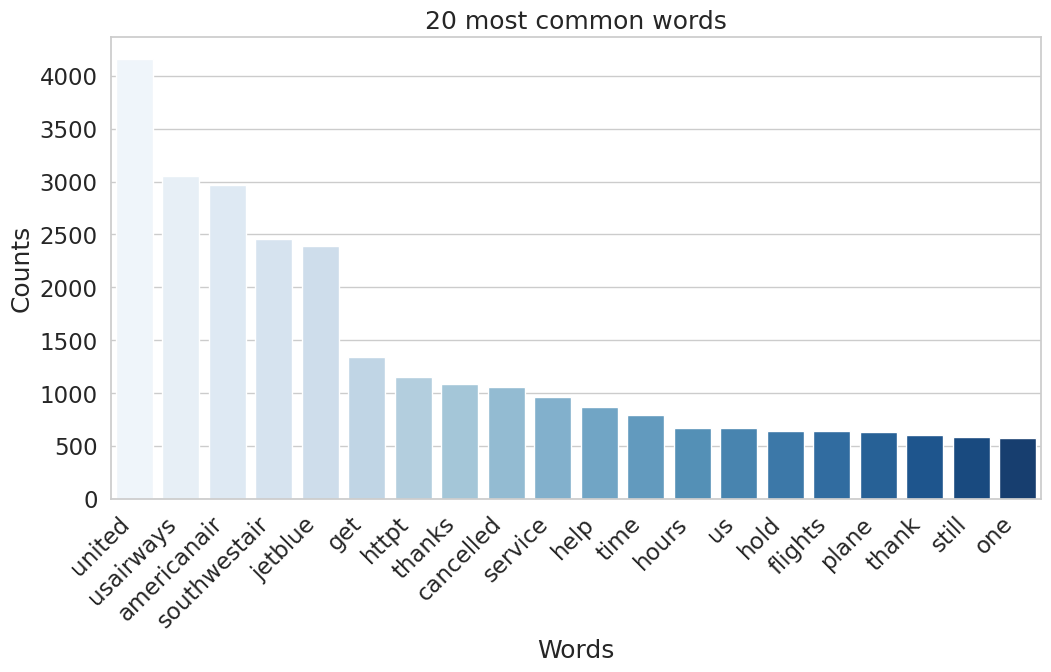

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

sns.set_style('whitegrid')
%matplotlib inline

stop = stop + ['Virgin America', 'San Francisco', 'Boston', 'New York', 'customer', 'flight', 'airline', 'San Diego', 'Oakland', 'California']

def plot_20_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))

    for t in count_data:
        total_counts += t.toarray()[0]

    count_dict = dict(zip(words, total_counts))
    count_dict = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)[:20]

    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]

    x_pos = np.arange(len(words))

    plt.figure(figsize=(12, 6))
    sns.set_context('notebook', font_scale=1.5)
    sns.barplot(x=x_pos, y=counts, palette='Blues')
    plt.title('20 most common words')
    plt.xticks(x_pos, words, rotation=45, ha='right')
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.show()


count_vectorizer = CountVectorizer(stop_words=stop)
count_data = count_vectorizer.fit_transform(tweets_df['text'])
plot_20_most_common_words(count_data, count_vectorizer)


<Axes: title={'center': 'Top 8 bigrams'}, ylabel='ngram'>

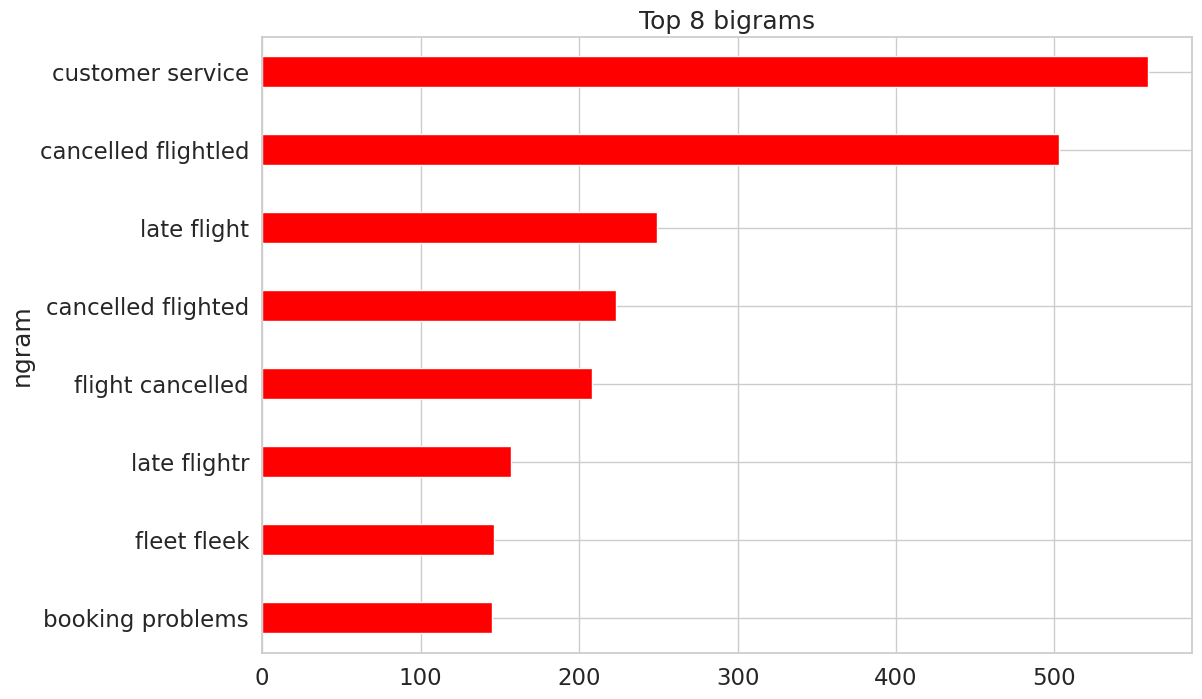

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

def get_top_n_bigram(corpus, n=None) :
  vec = CountVectorizer(ngram_range=(2, 4), stop_words="english").fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq =[(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

common_words = get_top_n_bigram(tweets_df['text'] , 8)
mydict={}
for word, freq in common_words:
  bigram_df = pd.DataFrame(common_words,columns = ['ngram', 'count'])

bigram_df.groupby( 'ngram' ).sum()['count'].sort_values(ascending=False).sort_values().plot.barh(title = 'Top 8 bigrams',color='red' , width=.4, figsize=(12,8),stacked = True)

# **APSIT REVIEW DATASET**







In [ ]:
tweets_df1 = pd.read_csv(r'/content/drive/MyDrive/dataset_sma/google (1).csv')

In [ ]:
tweets_df1.head(5)

,Link,Username,Rank,Timeline,Review,Response
0,https://lh3.googleusercontent.com/a-/ALV-UjWHb...,Saurabh Kanade,Local Guide · 37 reviews · 20 photos,6 months ago,Amezing ClassRooms.\nAir Conditioner & Fan Bot...,Like
1,https://lh3.googleusercontent.com/a/ACg8ocKaRp...,Rasika Pujare,Local Guide · 18 reviews · 170 photos,2 years ago,I visited the institute as it was my examinati...,NaN
2,https://lh3.googleusercontent.com/a-/ALV-UjV4l...,V S,Local Guide · 22 reviews · 7 photos,2 months ago,This was my CAT exam center. Though exam didn'...,Share
3,https://lh3.googleusercontent.com/a-/ALV-UjUV4...,Sneha Yadav,Local Guide · 7 reviews · 61 photos,4 years ago,"It's the best college in Thane, growing rapidl...",NaN
4,https://lh3.googleusercontent.com/a-/ALV-UjWll...,AJP Travel,"Local Guide · 112 reviews · 3,469 photos",2 years ago,It is beside highway so keep check on take in ...,NaN


In [ ]:
tweets_df1.shape

(190, 6)

In [ ]:
tweets_df1.head()

,Link,Username,Rank,Timeline,Review,Response
0,https://lh3.googleusercontent.com/a-/ALV-UjWHb...,Saurabh Kanade,Local Guide · 37 reviews · 20 photos,6 months ago,Amezing ClassRooms.\nAir Conditioner & Fan Bot...,Like
1,https://lh3.googleusercontent.com/a/ACg8ocKaRp...,Rasika Pujare,Local Guide · 18 reviews · 170 photos,2 years ago,I visited the institute as it was my examinati...,NaN
2,https://lh3.googleusercontent.com/a-/ALV-UjV4l...,V S,Local Guide · 22 reviews · 7 photos,2 months ago,This was my CAT exam center. Though exam didn'...,Share
3,https://lh3.googleusercontent.com/a-/ALV-UjUV4...,Sneha Yadav,Local Guide · 7 reviews · 61 photos,4 years ago,"It's the best college in Thane, growing rapidl...",NaN
4,https://lh3.googleusercontent.com/a-/ALV-UjWll...,AJP Travel,"Local Guide · 112 reviews · 3,469 photos",2 years ago,It is beside highway so keep check on take in ...,NaN


In [ ]:
tweets_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Link      190 non-null    object
 1   Username  190 non-null    object
 2   Rank      190 non-null    object
 3   Timeline  190 non-null    object
 4   Review    190 non-null    object
 5   Response  168 non-null    object
dtypes: object(6)
memory usage: 9.0+ KB


In [ ]:
tweets_df1.value_counts(tweets_df1['Review'])

Review
The college is very good and road touch.\n\nThe faculty is nice and good infrastructure. …                                                                                                                                                                                                                                  2
2019-20 batch have not yet received their convocation wheras 2020-21 batch have received??                                                                                                                                                                                                                                  1
One of the best engineering college in Mumbai.\nCollege has Nice infrastructure, AC Classrooms and Advanced Labs.\nMany Courses conducted by college free of cost other than curriculum.\nCollege having excellent  TPO cell as well.                                                                                       1
One of the BEST College lf MUMBAI UNIVE

In [ ]:
tweets_df1.value_counts(tweets_df1['Response'])

Response
Share    165
Like       3
Name: count, dtype: int64

In [ ]:
tweets_df1['Response'].isnull().sum()

22

In [ ]:
tweets_df1.isnull().sum()

Link         0
Username     0
Rank         0
Timeline     0
Review       0
Response    22
dtype: int64

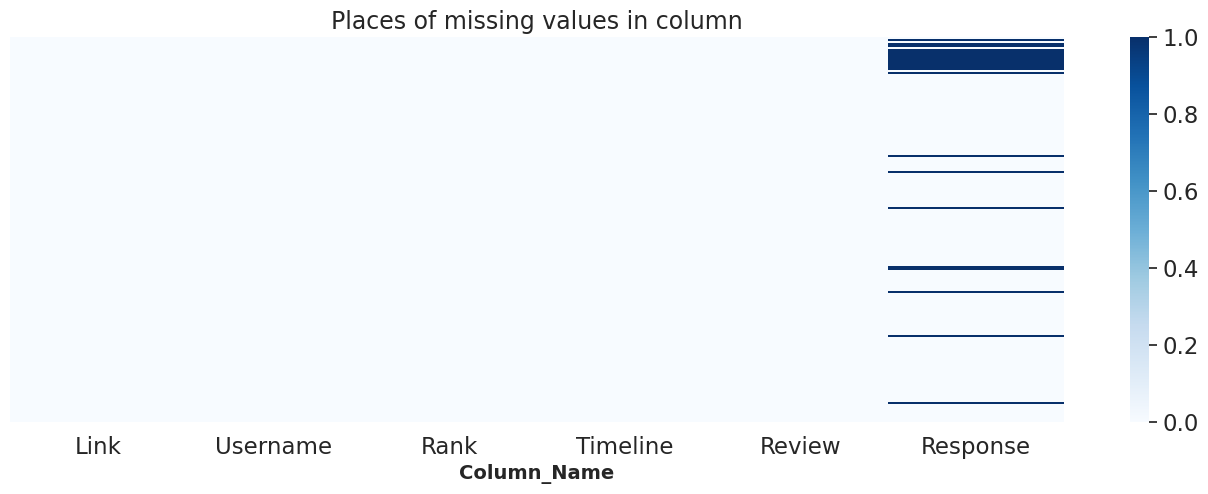

In [ ]:
plt.figure(figsize=(17, 5))
sns.heatmap(tweets_df1.isnull(), cbar=True, yticklabels=False,cmap="Blues")
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",size=17)
plt.show()

<Axes: >

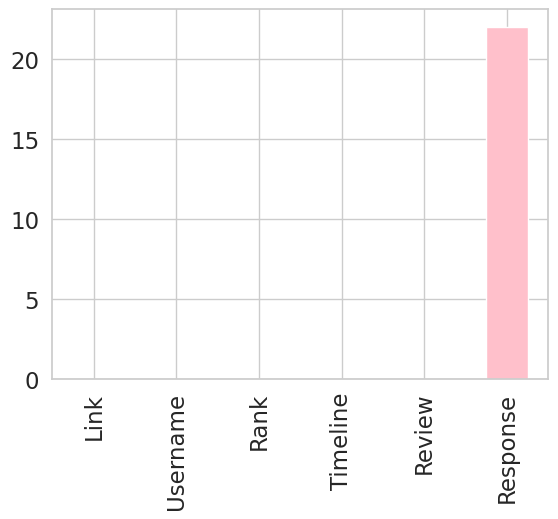

In [ ]:
tweets_df1.isnull().sum().plot(kind="bar",color="pink")

In [ ]:
import plotly.graph_objects as go
Top_Location_Of_tweet= tweets_df1['Review'].value_counts().head (10)

In [ ]:
print(Top_Location_Of_tweet)

Review
The college is very good and road touch.\n\nThe faculty is nice and good infrastructure. …                                                                                                                                                                         2
Amezing ClassRooms.\nAir Conditioner & Fan Both are Available In Each Class.\n5 Floors Building. …                                                                                                                                                                 1
Impossible for you to reach without google ma.\nNot even a single auto rickshawala or bus conductor knows where the college is.\nReally difficult to travel if you are staying in Mumbai.                                                                          1
Apsit is the best education center in Thane with the best learning exposure.College infrastructure is very good.The college provides workshops and other industrial exposure to enhance teaching programs.Facultie

In [ ]:
from nltk. corpus import stopwords
stop = stopwords.words('english')
tweets_df1['Review'].apply(lambda x: [item for item in x if item not in stop])
tweets_df1.shape

(190, 6)

In [ ]:
tweets_df1['Review'].head(10)

0    Amezing ClassRooms.\nAir Conditioner & Fan Bot...
1    I visited the institute as it was my examinati...
2    This was my CAT exam center. Though exam didn'...
3    It's the best college in Thane, growing rapidl...
4    It is beside highway so keep check on take in ...
5    Best college for engineering colleges if in fr...
6    AP SHAH  INSTITUTE OF                      TEC...
7    A.P. Shah Institute of Technology, one of the ...
8    This is one of the best engineering college in...
9    The Infrastructure of this college is excellen...
Name: Review, dtype: object

In [ ]:
tweets_df1['Review'] = tweets_df1['Review'].apply(lambda x: remove_punctuations(x))

In [ ]:
tweets_df1['Review'].head(10)

0    Amezing ClassRooms.\nAir Conditioner  Fan Both...
1    I visited the institute as it was my examinati...
2    This was my CAT exam center. Though exam didn'...
3    It's the best college in Thane, growing rapidl...
4    It is beside highway so keep check on take in ...
5    Best college for engineering colleges if in fr...
6    AP SHAH  INSTITUTE OF                      TEC...
7    A.P. Shah Institute of Technology, one of the ...
8    This is one of the best engineering college in...
9    The Infrastructure of this college is excellen...
Name: Review, dtype: object

In [ ]:
tweets_df1['Review'].isnull().sum()

0

In [ ]:
tweets_df1['Review'].replace( '', np.nan, inplace=True)
tweets_df1.dropna(subset=["Review"],inplace=True)
len(tweets_df1)

190

In [ ]:
tweets_df1 = tweets_df1.reset_index(drop=True)
tweets_df1.head()

,Link,Username,Rank,Timeline,Review,Response
0,https://lh3.googleusercontent.com/a-/ALV-UjWHb...,Saurabh Kanade,Local Guide · 37 reviews · 20 photos,6 months ago,Amezing ClassRooms.\nAir Conditioner Fan Both...,Like
1,https://lh3.googleusercontent.com/a/ACg8ocKaRp...,Rasika Pujare,Local Guide · 18 reviews · 170 photos,2 years ago,I visited the institute as it was my examinati...,NaN
2,https://lh3.googleusercontent.com/a-/ALV-UjV4l...,V S,Local Guide · 22 reviews · 7 photos,2 months ago,This was my CAT exam center. Though exam didn'...,Share
3,https://lh3.googleusercontent.com/a-/ALV-UjUV4...,Sneha Yadav,Local Guide · 7 reviews · 61 photos,4 years ago,"It's the best college in Thane, growing rapidl...",NaN
4,https://lh3.googleusercontent.com/a-/ALV-UjWll...,AJP Travel,"Local Guide · 112 reviews · 3,469 photos",2 years ago,It is beside highway so keep check on take in ...,NaN


In [ ]:
from sklearn.feature_extraction. text import TfidfVectorizer, CountVectorizer

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ap', 'apsit', 'institute', 'shah', 'technology'] not in stop_words.

<ipython-input-99-3aee185b1fee>:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




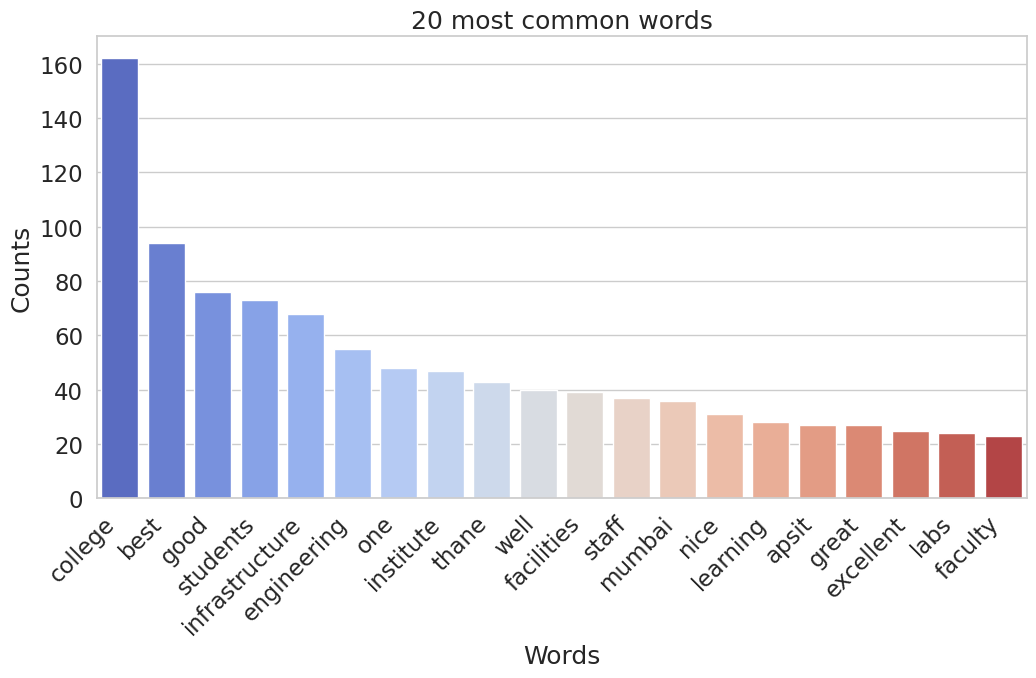

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

sns.set_style('whitegrid')
%matplotlib inline

stop = stop + ['Institute', 'APSIT', 'AP', 'Shah', 'Technology']

def plot_20_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))

    for t in count_data:
        total_counts += t.toarray()[0]

    count_dict = dict(zip(words, total_counts))
    count_dict = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)[:20]

    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]

    x_pos = np.arange(len(words))

    plt.figure(figsize=(12, 6))
    sns.set_context('notebook', font_scale=1.5)
    sns.barplot(x=x_pos, y=counts, palette='coolwarm')
    plt.title('20 most common words')
    plt.xticks(x_pos, words, rotation=45, ha='right')
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.show()


count_vectorizer = CountVectorizer(stop_words=stop)
count_data = count_vectorizer.fit_transform(tweets_df1['Review'])
plot_20_most_common_words(count_data, count_vectorizer)

<Axes: title={'center': 'Top 8 bigrams'}, ylabel='ngram'>

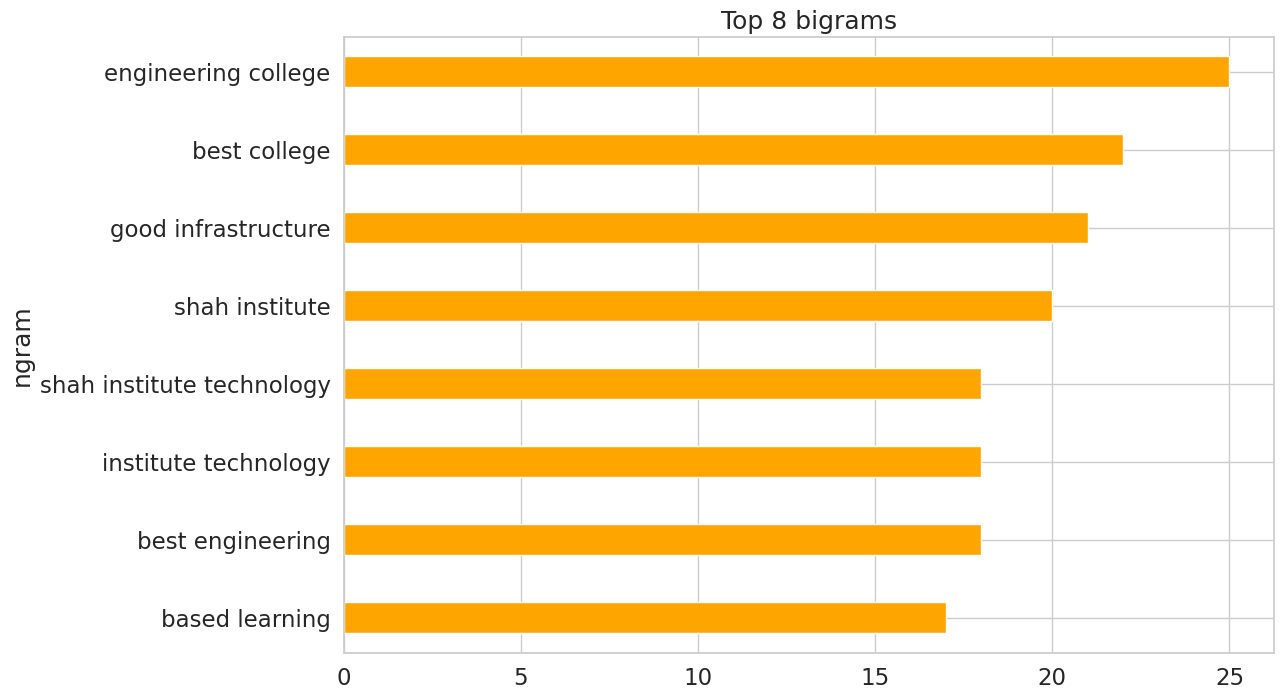

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

def get_top_n_bigram(corpus, n=None) :
  vec = CountVectorizer(ngram_range=(2, 4), stop_words="english").fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq =[(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

common_words = get_top_n_bigram(tweets_df1['Review'] , 8)
mydict={}
for word, freq in common_words:
  bigram_df = pd.DataFrame(common_words,columns = ['ngram', 'count'])

bigram_df.groupby( 'ngram' ).sum()['count'].sort_values(ascending=False).sort_values().plot.barh(title = 'Top 8 bigrams',color='orange' , width=.4, figsize=(12,8),stacked = True)